Model fitting with `numpy.polyfit`. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import sys
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [4]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import faai

In [5]:
poly = faai.NoisyPolynomial([1, 2, 3], normal_std=5., step=0.25, random_state=4)

poly.y_noisy

array([66.25280854, 61.68725667, 47.77045534, 50.15549254, 38.9084924 ,
       27.76461382, 27.51146616, 29.18037587, 23.66125016, 12.45011684,
       17.84334845, 11.24756536, 11.12536198,  8.34876573, -1.0340813 ,
        4.94248577, -1.03443642,  8.92239665,  4.36670804,  0.91817784,
       -3.91495827,  1.95966369,  3.54946468, -1.8572408 , 17.11680108,
       10.15897607, 19.21178858,  8.12343923, 25.17873771, 13.88267204,
       21.49387083, 31.89975654, 34.24003124, 27.39713183, 39.22207978,
       54.87668177, 67.43935434, 68.26170479, 69.36898323, 82.17005949])

In [6]:
coefs_estimated = np.polyfit(poly.x, poly.y_noisy, deg=2)
fitted_polynimial = np.poly1d(coefs_estimated)

for i, c in enumerate(reversed(coefs_estimated)):
    print('a_{} = {:.3f}'.format(i, c))

a_0 = 1.275
a_1 = 2.239
a_2 = 2.999


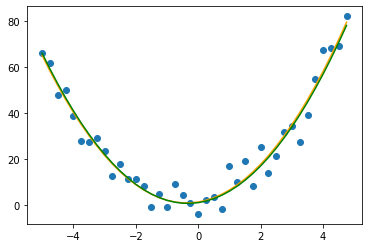

In [7]:
plt.scatter(poly.x, poly.y_noisy)
plt.plot(poly.x, fitted_polynimial(poly.x), color='orange')

plt.plot(poly.x, 3 * poly.x**2 + 2 * poly.x + 1, 'green')

plt.show()